**About this dataset**<br>
 
1. Age: Age (in years) 
2. Sex: gender (1 = male; 0 = female) 
3. ChestPain: Chest Pain type -- 1: typical angina (all criteria present) -- 2: atypical angina (two of three criteria satisfied) -- 3: non-anginal pain (less than one criteria satisfied) -- 4: asymptomatic (none of the criteria are satisfied) 0:"asymptomatic", 1: "typical angina", 2:"atypical angina", 3:"non-anginal pain"
4. Restbps: Resting Blood pressure (in mmHg, upon admission to the hospital) 
5. Chol: serum cholesterol in mg/dL 
6. Fbs: fasting blood sugar > 120 mg/dL (likely to be diabetic) 1 = true; 0 = false 
7. RestECG: Resting electrocardiogram results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. MaxHR: Greatest number of beats per minute your heart can possibly reach during all-out strenuous exercise. 
9. Exang: exercise induced angina (1 = yes; 0 = no) 
10. Oldpeak: ST depression induced by exercise relative to rest (in mm, achieved by subtracting the lowest ST segment points during exercise and rest) 
11. Slope: the slope of the peak exercise ST segment, ST-T abnormalities are considered to be a crucial indicator for identifying presence of ischaemia -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping 
12. Ca: number of major vessels (0-3) colored by fluoroscopy. Major cardial vessels are as goes: aorta, superior vena cava, inferior vena cava, pulmonary artery (oxygen-poor blood --> lungs), pulmonary veins (oxygen-rich blood --> heart), and coronary arteries (supplies blood to heart tissue). 
13. thal: 0 = normal; 1 = fixed defect (heart tissue can't absorb thallium both under stress and in rest); 2 = reversible defect (heart tissue is unable to absorb thallium only under the exercise portion of the test) 
14. target: 0 = no disease, 1 = disease



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle

In [ ]:
df=pd.read_csv('Heart Attack Data Set.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data=df

In [ ]:
data.shape

(303, 14)

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# checking for null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [ ]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
# Percentage of patients have and do not have heart disease
data['target'].value_counts()/data.shape[0]*100

1    54.455446
0    45.544554
Name: target, dtype: float64

**EXPLORATORY DATA ANALYSIS**

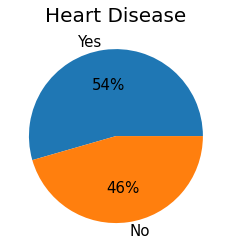

In [ ]:
# Create a plot to display the percentage of the positive and negative heart disease 
labels = ['Yes', 'No']
values = data['target'].value_counts().values
plt.rcParams["figure.figsize"] = (8,4)
plt.pie(values, labels=labels, autopct='%1.0f%%', textprops = {"fontsize" : 15})
plt.title('Heart Disease', fontsize=20)
plt.show()

We can see that, the dataset contains 14 columns 5 of them are numerical values and 9 of them are categorical values. We can see also there are no missing values in this dataset. As for the data balancing, the data is relatively balanced, 56% of the persons in the dataset have heart disease.

In [ ]:
df_gender = data.groupby(["sex","target"]).size()
df_gender

sex  target
0    0          24
     1          72
1    0         114
     1          93
dtype: int64

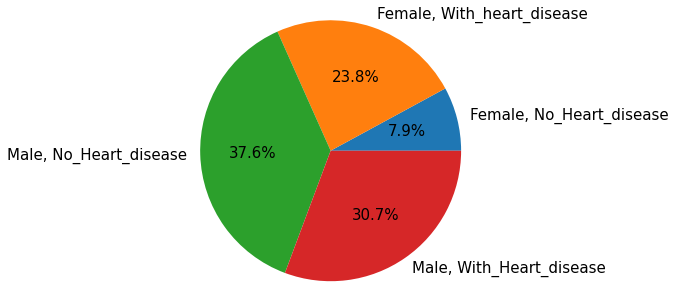

In [ ]:
plt.pie(df_gender.values, labels = ["Female, No_Heart_disease", "Female, With_heart_disease", 
                                    "Male, No_Heart_disease", "Male, With_Heart_disease"],autopct='%1.1f%%',radius = 1.5, 
        textprops = {"fontsize" : 15})
plt.show()

The ratio of male having a heart disease is 30.7%, a little bit higher than female.

In [ ]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


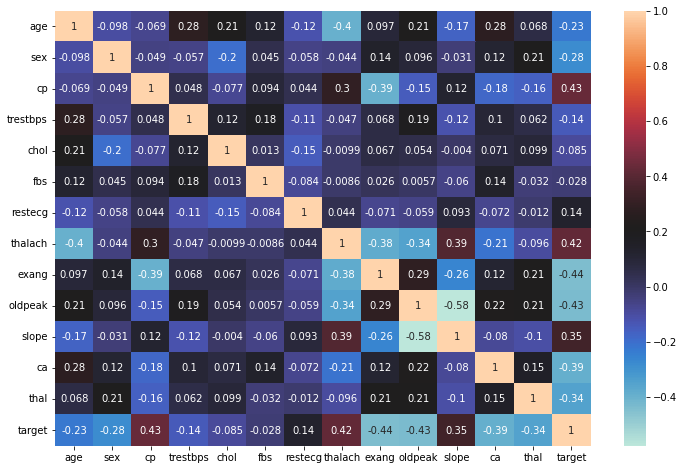

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cbar=True, cmap='icefire')

This heatmap shows the correlations between the dataset attributes, and how the attributes interact with each other. From the heatmap, we can observe that the chest pain type (cp), exercise-induced angina (exang), ST depression induced by exercise relative to rest (oldpeak), the slope of the peak exercise ST segment (slope), number of major vessels (0–3) colored by flourosopy (ca) and thalassemia (thal) are highly correlated with the heart disease (target). We observe also that there is an inverse proportion between heart disease and maximum heart rate (thalch).

Moreover, we can see that the age is correlated with number of major vessels (0–3) colored by flourosopy (ca) and maximum heart rate (thalch). There is also a relation between ST depression induced by exercise relative to rest (oldpeak) and the slope of the peak exercise ST segment (slope). Moreover, there is a relation between chest pain type (cp) and exercise-induced angina (exang).

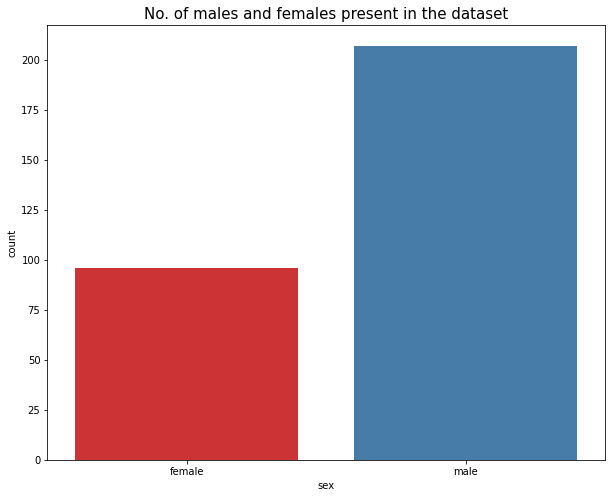

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='sex', data=data, palette='Set1')
plt.xticks(ticks=[0, 1], labels = ["female", "male"])
plt.title("No. of males and females present in the dataset", size=15)
plt.show()

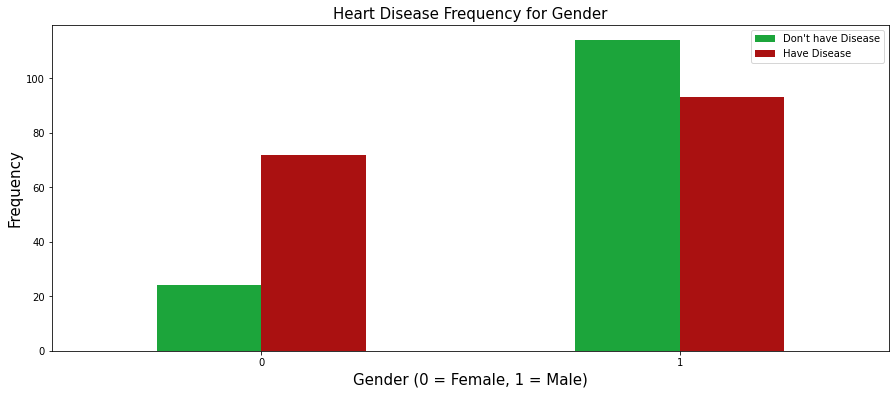

In [ ]:
pd.crosstab(data.sex, data.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Gender', fontsize=15)
plt.xlabel('Gender (0 = Female, 1 = Male)', fontsize=15)
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency',fontsize=15)
plt.show()

Text(0.5, 1.0, 'Heart Disease Frequency According To Chest Pain Type')

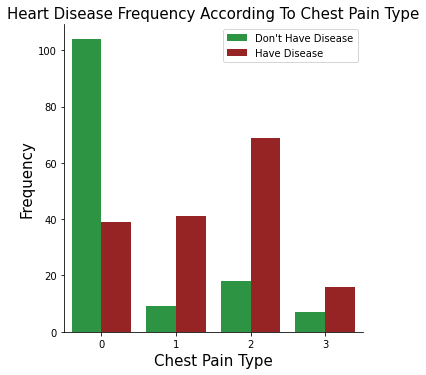

In [ ]:
sns.catplot(x="cp", hue="target", kind="count", data=data, legend=False,  palette=sns.color_palette(['#1CA53B','#AA1111']))
plt.legend(["Don't Have Disease", "Have Disease"])
plt.xlabel('Chest Pain Type', fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Heart Disease Frequency According To Chest Pain Type', fontsize=15)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


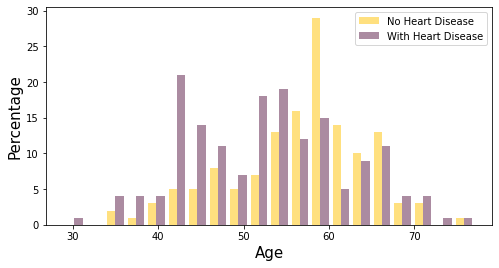

In [ ]:
plt.hist([data[data.target==0].age, data[data.target==1].age], bins = 20, alpha = 0.5, label = ["No Heart Disease","With Heart Disease"], color=['#FFC300','#581845'])
plt.xlabel("Age", fontsize=15)
plt.ylabel("Percentage", fontsize=15)
plt.legend()
plt.show()

From the above graphs and data we can say that heart diseases can occur in both young and old people, but the chances are higher in old people.

In [ ]:
# Get min, max and average of the age
print('Min age in dataset: ', min(data['age']))
print('Max age in dataset: ', max(data['age']))
print('Average age: ', data['age'].mean())

Min age in dataset:  29
Max age in dataset:  77
Average age:  54.366336633663366


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


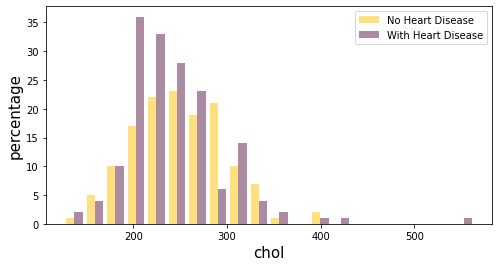

In [ ]:
plt.hist([data[data.target==0].chol, data[data.target==1].chol], bins = 20, alpha = 0.5, label = ["No Heart Disease","With Heart Disease"],color=['#FFC300','#581845'])
plt.xlabel("chol", fontsize=15)
plt.ylabel("percentage", fontsize=15)
plt.legend()
plt.show()

The number of people having heart disease are over 200mg/dl of chol. 
The normal value of chol should be lower than 200mg/dl.

Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less heamoglobin than normal. Hemoglobin enables red blood cells to carry oxygen


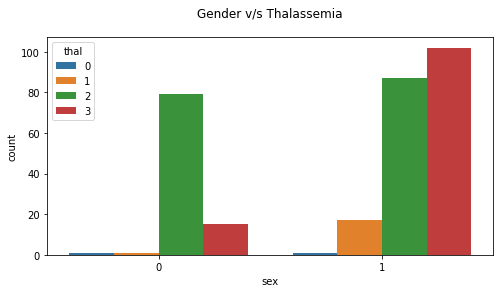

In [ ]:
sns.countplot(data= data, x='sex',hue='thal')
plt.title('Gender v/s Thalassemia\n')
print('Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less heamoglobin than normal. Hemoglobin enables red blood cells to carry oxygen')

Text(0.5, 1.0, 'Slope v/s Target\n')

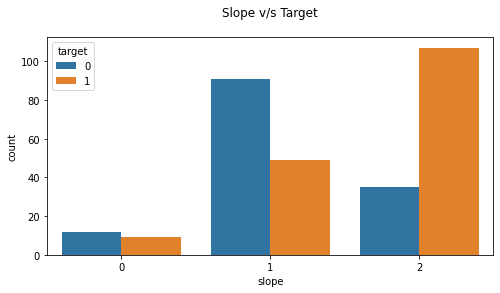

In [ ]:
sns.countplot(data= data, x='slope',hue='target')
plt.title('Slope v/s Target\n')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'thalach of Heart Diseased Patients\n')

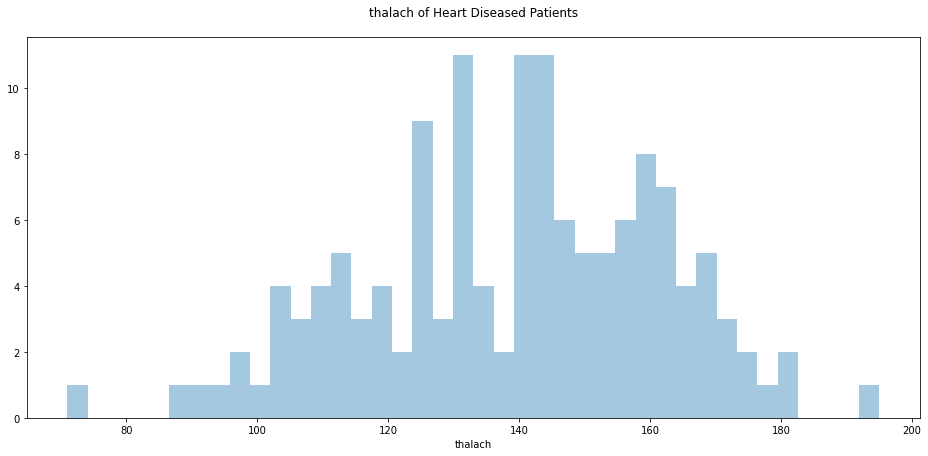

In [ ]:
plt.figure(figsize=(16,7))
sns.distplot(data[data['target']==0]['thalach'],kde=False,bins=40)
plt.title('thalach of Heart Diseased Patients\n')

Text(26.426458333333343, 0.5, 'ST depression')

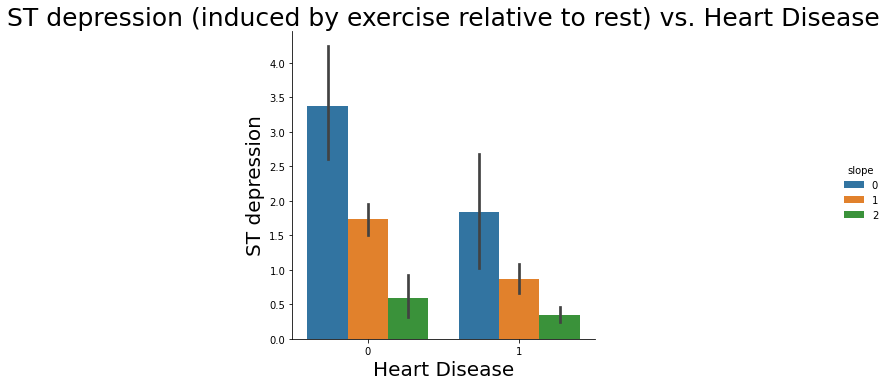

In [ ]:
sns.catplot(x="target", y="oldpeak", hue="slope", kind="bar", data=data);

plt.title('ST depression (induced by exercise relative to rest) vs. Heart Disease',size=25)
plt.xlabel('Heart Disease',size=20)
plt.ylabel('ST depression',size=20)

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Machine Learning model used: Random Forest

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(random_state=1)# get instance of model
model6.fit(x_train, y_train) # Train/Fit model 

y_pred6 = model6.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred6)) # output accuracy

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



**Precision, Recall, F1-score and Support:**<br>
Precision : “how many are correctly classified among that class”<br>
Recall : “how many of this class you find over the whole number of element of this class”<br>
F1-score : harmonic mean of precision and recall values.<br>
F1 score reaches its best value at 1 and worst value at 0.<br>
F1 Score = 2 x ((precision x recall) / (precision + recall))<br>
Support: # of samples of the true response that lie in that class.


**Making the Confusion Matrix**<br>
A confusion matrix, also known as an error matrix, is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm. It allows easy identification of confusion between classes.<br>
The key to the confusion matrix is the number of correct and incorrect predictions are summarizedwith count values and broken down by each class not just the number of errors made.


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred6)
print(cm)
print('Accuracy:')
accuracy_score(y_test, y_pred6)

[[21  9]
 [ 3 28]]
Accuracy:


0.8032786885245902

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


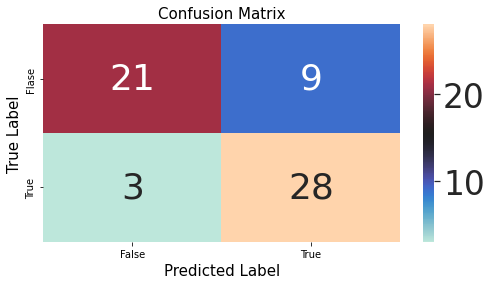

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model6, x_test, y_test)
ax = plt.subplot()
sns.set(font_scale=3.0) #edited as suggested
sns.heatmap(cm, annot=True, ax=ax, cmap="icefire", fmt="g");  # annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('Observed labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);

label_font = {'size':'18'}  # Adjust to fit


plt.title('Confusion Matrix',fontsize=15)
plt.xlabel('Predicted Label',fontsize=15)
plt.ylabel('True Label',fontsize=15)
plt.show()

**Interpreting the confusion matrix:**<br>
21 is the amount of True Positives in our data, while 28 is the amount of True Negatives.<br>
9 & 3 are the number of errors.<br>
There are 9 Type 1 errors (False Positives)- You predicted positive and it’s false.<br>
There are 3 Type 2 errors (False Negatives)- You predicted negative and it’s false.

**Feature Importance:**<br>
Feature Importance provides a score that indicates how helpful each feature was in our model.The higher the Feature Score, the more that feature is used to make key decisions & thus the more important it is.

In [ ]:
# get importance
importance = model6.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.07814
Feature: 1, Score: 0.04206
Feature: 2, Score: 0.16580
Feature: 3, Score: 0.07477
Feature: 4, Score: 0.07587
Feature: 5, Score: 0.00828
Feature: 6, Score: 0.02014
Feature: 7, Score: 0.12772
Feature: 8, Score: 0.06950
Feature: 9, Score: 0.09957
Feature: 10, Score: 0.04677
Feature: 11, Score: 0.11667
Feature: 12, Score: 0.07473


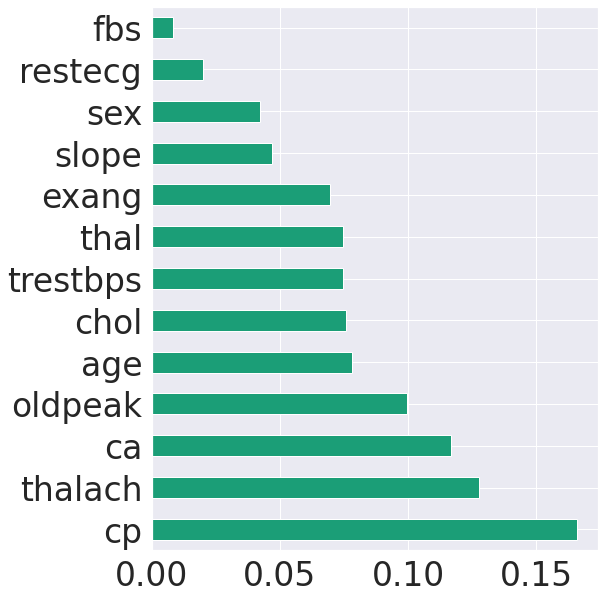

In [ ]:
index= data.columns[:-1]
importance = pd.Series(model6.feature_importances_, index=index)
plt.figure(figsize=(8,10))
importance.nlargest(13).plot(kind='barh', colormap='Dark2')

From the Feature Importance graph above, we can conclude that the top 4 significant features were chest pain type (cp), maximum heart rate achieved (thalach), number of major vessels (ca), and ST depression induced by exercise relative to rest (oldpeak).

**PREDICTIONS:**<br>
He is a 20 year old male, with a chest pain value of 2 (atypical angina), with resting blood pressure of 110.
In addition he has a serum cholestoral of 230 mg/dl.
He is fasting blood sugar > 120 mg/dl.
He has a resting electrocardiographic result of 1.
The patients maximum heart rate achieved is 140.
Also, he was exercise induced angina.
His ST depression induced by exercise relative to rest value was 2.2.
The slope of the peak exercise ST segment is flat.
He has no major vessels colored by fluoroscopy, and in addition his maximum heart rate achieved is a reversible defect.

In [ ]:
print(model6.predict(sc.transform([[20,1,2,110,230,1,1,140,1,2.2,2,0,2]])))

[1]


In [ ]:
y_pred = model6.predict(x_test)
x=np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

In [ ]:
# Save the model as serialized object pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model6, file)